In [1]:
from nsepy import get_history
from datetime import date
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import darts 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from darts.timeseries import TimeSeries
from darts.models import Theta
from darts.metrics import mape
import yfinance as yf
import seaborn as sns
%matplotlib inline
%autosave 1
plt.rcParams["figure.figsize"] = (20,10)

Importing plotly failed. Interactive plots will not work.


Autosaving every 1 seconds


In [2]:
# today = date.today()
# ticker = get_history(symbol="NIFTY", 
#                     start=date(1980,1,1), 
#                     end=today,
#                     index=True
#                     )
# ticker.dropna(inplace=True)
# ticker

In [3]:
# ticker = pd.DataFrame(ticker['Close'])
# ticker.reset_index(drop=True,inplace=True)
# ticker[::].plot();

In [4]:
# ticker

In [19]:
raw = yf.download('IBM')
ticker = pd.DataFrame(raw['Close'])
ticker.dropna(inplace=True)
ticker.reset_index(drop = True,inplace=True)
ticker

[*********************100%***********************]  1 of 1 completed


,Close
0,7.291268
1,7.355003
2,7.281708
3,7.138305
4,7.004461
...,...
15116,131.580002
15117,130.820007
15118,129.350006
15119,128.820007


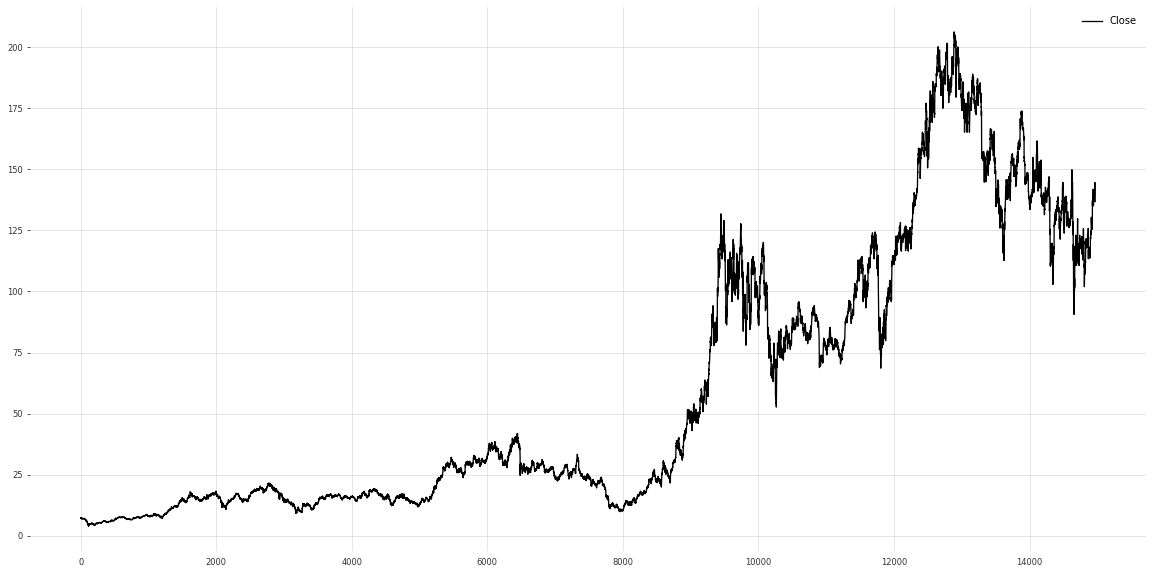

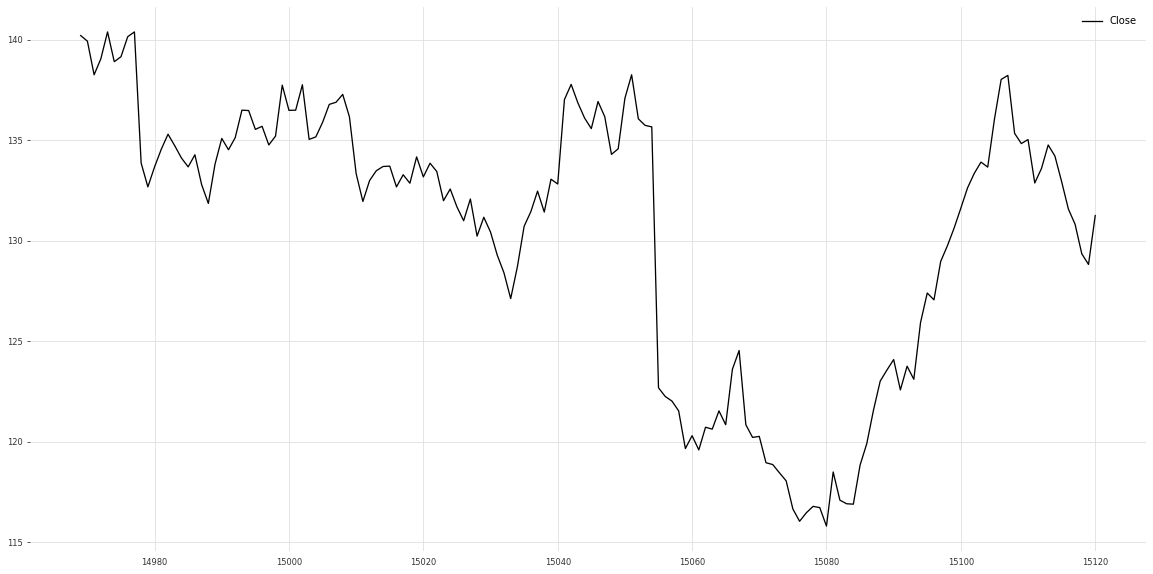

In [16]:
length = int(len(ticker)*(.99))
train_b, val_b = ticker[:length], ticker[length:]
train_b.plot()
val_b.plot();

In [35]:
data = ticker

Time_Frame = '1D'

print('   ')

print(f"TimeFrame Selected = {Time_Frame}")

print('   ')

print('Fitting into valid timeseries format...')

print('   ')
#converting into timeseris format

data_timeseries = TimeSeries.from_dataframe(data, time_col=None, value_cols=None, fill_missing_dates=False, freq='B', fillna_value=False)

#Splitting into training and testing
length = int(len(data)*(.80))
train, val = data_timeseries[:length], data_timeseries[length:]

# Search for the best theta parameter, by trying different values

print('Searching the best theta...')

print('   ')

thetas = np.linspace(-30, 30, 1000)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE for the model is: {:.4f} %, with theta = {}.'.format(mape(val, pred_best_theta), best_theta))


#backtesting 
print('   ')

print('Backtesting...')

print('   ')

#must between 99 and 1


   
TimeFrame Selected = 1D
   
Fitting into valid timeseries format...
   
Searching the best theta...
   
The MAPE for the model is: 16.8641 %, with theta = 1.1111111111111107.
   
Backtesting...
   


In [ ]:
16.8641 %, with theta = 1.1111111111111107.

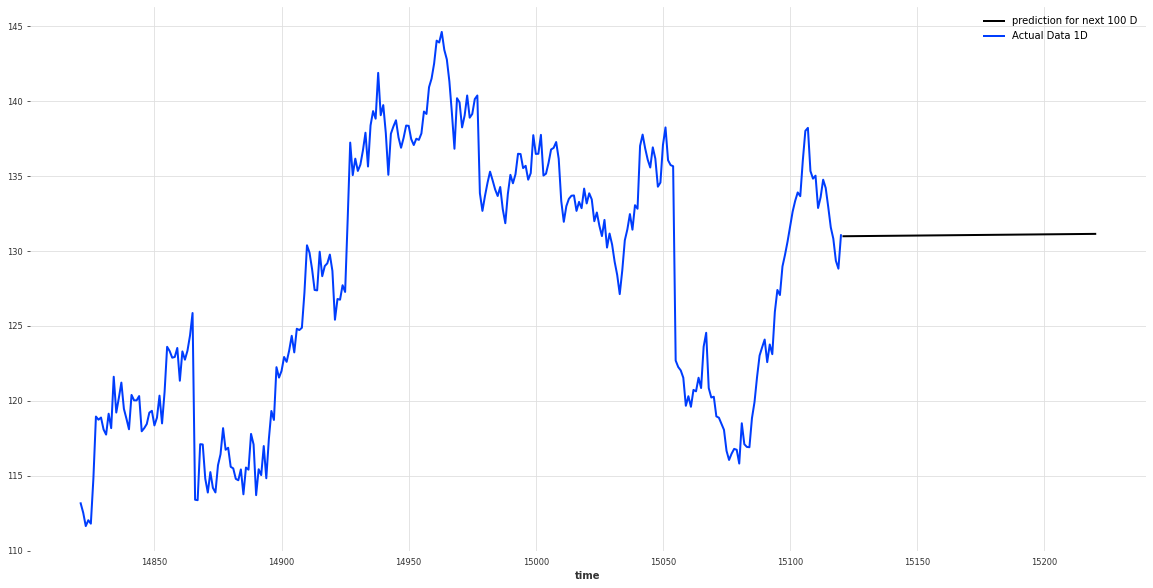

In [23]:
#my model 
best_theta_model = Theta(best_theta)
best_theta_model.fit(data_timeseries)
prediction = best_theta_model.predict(forecast_horizon)

print(' ')
# plotting the prediction


prediction.plot(label=f"prediction for next {forecast_horizon * int(Time_Frame[:-1])} {Time_Frame[-1:]}")
data_timeseries[-300:].plot(label=f"Actual Data {Time_Frame}")

In [21]:
test_for_recent_percentage_data = 10  

forecast_horizon = 100

print(f"Forecast horizon selected = {forecast_horizon} upcoming predictions ")

historical_fcast_theta = best_theta_model.historical_forecasts(data_timeseries,
                                                               start=(100-test_for_recent_percentage_data)/100,
                                                               forecast_horizon=forecast_horizon,
                                                               verbose=True)

print('MAPE for backtesting = {:.2f}%'.format(mape(historical_fcast_theta, data_timeseries)))

print(' ')

Forecast horizon selected = 100 upcoming predictions 


  0%|          | 0/1414 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
data = ticker

Time_Frame = '1D'

print('   ')

print(f"TimeFrame Selected = {Time_Frame}")

print('   ')

print('Fitting into valid timeseries format...')

print('   ')
#converting into timeseris format

data_timeseries = TimeSeries.from_dataframe(data, time_col=None, value_cols=None, fill_missing_dates=False, freq='B', fillna_value=False)

#Splitting into training and testing
length = int(len(data)*(.80))
train, val = data_timeseries[:length], data_timeseries[length:]

# Search for the best theta parameter, by trying different values

print('Searching the best theta...')

print('   ')

thetas = np.linspace(-300, 300, 600)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE for the model is: {:.2f} %, with theta = {}.'.format(mape(val, pred_best_theta), best_theta))


#backtesting 
print('   ')

print('Backtesting...')

print('   ')

#must between 99 and 1

test_for_recent_percentage_data = 10  

forecast_horizon = 100

print(f"Forecast horizon selected = {forecast_horizon} upcoming predictions ")

historical_fcast_theta = best_theta_model.historical_forecasts(data_timeseries,
                                                               start=(100-test_for_recent_percentage_data)/100,
                                                               forecast_horizon=forecast_horizon,
                                                               verbose=True)

print('MAPE for backtesting = {:.2f}%'.format(mape(historical_fcast_theta, data_timeseries)))

print(' ')

#my model 
best_theta_model = Theta(best_theta)
best_theta_model.fit(data_timeseries)
prediction = best_theta_model.predict(forecast_horizon)

print(' ')
# plotting the prediction


prediction.plot(label=f"prediction for next {forecast_horizon * int(Time_Frame[:-1])} {Time_Frame[-1:]}")
data_timeseries[-300:].plot(label=f"Actual Data {Time_Frame}")

In [ ]:
#my model 
best_theta_model = Theta(best_theta)
best_theta_model.fit(data_timeseries)
prediction = best_theta_model.predict(365)

print(' ')
# plotting the prediction


prediction.plot(label=f"prediction for next {forecast_horizon * int(Time_Frame[:-1])} {Time_Frame[-1:]}")
data_timeseries[-300:].plot(label=f"Actual Data {Time_Frame}")

In [ ]:
test_for_recent_percentage_data = 99                           

historical_fcast_theta = best_theta_model.historical_forecasts(data_timeseries,
                                                               start=(100-test_for_recent_percentage_data)/100,
                                                               forecast_horizon=1,
                                                               verbose=True)

data_timeseries.plot(label='data')
historical_fcast_theta.plot(label=f"backtest for last {test_for_recent_percentage_data} %")
print('MAPE = {:.2f}%'.format(mape(historical_fcast_theta, data_timeseries)))

In [ ]:
t = -500
data_timeseries[t:].plot(label='data')
historical_fcast_theta[t:].plot(label=f"backtest for last {test_for_recent_percentage_data} %")
print('MAPE = {:.2f}%'.format(mape(historical_fcast_theta, data_timeseries)))